In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/basketball_stats_clean.csv')

In [ ]:
print("10 Data Awal:")
print(df.head(10))

# Menampilkan 10 data akhir
print("\n10 Data Akhir:")
print(df.tail(10))

10 Data Awal:
   game        date  age team  opp result        mp  fg  fga    fgp  ...  drb  \
0     1  10/29/2003   18  CLE  SAC      L  42:00:00  12   20  0.600  ...    4   
1     2  10/30/2003   18  CLE  PHO      L  41:00:00   8   17  0.471  ...   10   
2     3   11/1/2003   18  CLE  POR      L  39:00:00   3   12  0.250  ...    4   
3     4   11/5/2003   18  CLE  DEN      L  41:00:00   3   11  0.273  ...    9   
4     5   11/7/2003   18  CLE  IND      L  44:00:00   8   18  0.444  ...    5   
5     6   11/8/2003   18  CLE  WAS      W  45:00:00   8   19  0.421  ...    3   
6     7  11/10/2003   18  CLE  NYK      W  34:00:00   7   12  0.583  ...    4   
7     8  11/12/2003   18  CLE  MIA      L  42:00:00   6   15  0.400  ...    2   
8     9  11/14/2003   18  CLE  BOS      L  35:00:00   3   12  0.250  ...    4   
9    10  11/15/2003   18  CLE  PHI      W  47:00:00  10   19  0.526  ...    5   

   trb  ast  stl  blk  tov  pts  game_score  minus_plus        Player  
0    6    9    4    0 

In [ ]:
le = LabelEncoder()
df['result_encoded'] = le.fit_transform(df['result'])

In [ ]:
features = ['age', 'fg', 'three', 'ft', 'pts', 'game_score']
X = df[features]
y = df['result_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Akurasi Model: 0.7256235827664399
Training Accuracy: 0.7022 (70.22%)
Testing Accuracy: 0.7256 (72.56%)


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Loss', 'Win']))


Classification Report:
              precision    recall  f1-score   support

        Loss       0.63      0.42      0.50       146
         Win       0.75      0.88      0.81       295

    accuracy                           0.73       441
   macro avg       0.69      0.65      0.66       441
weighted avg       0.71      0.73      0.71       441



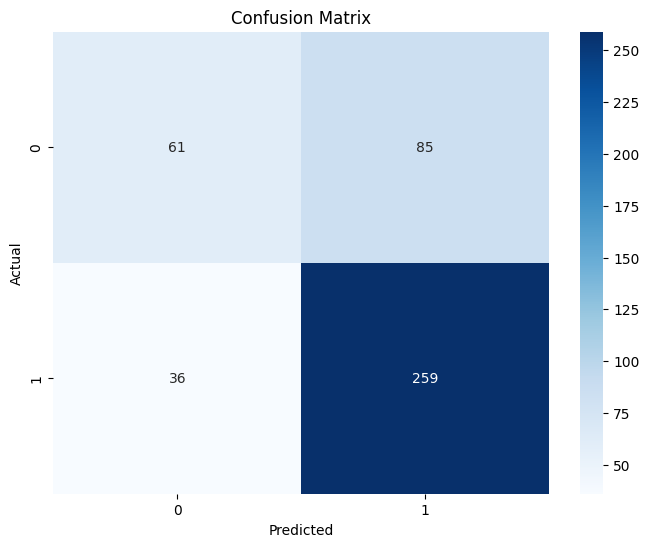

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

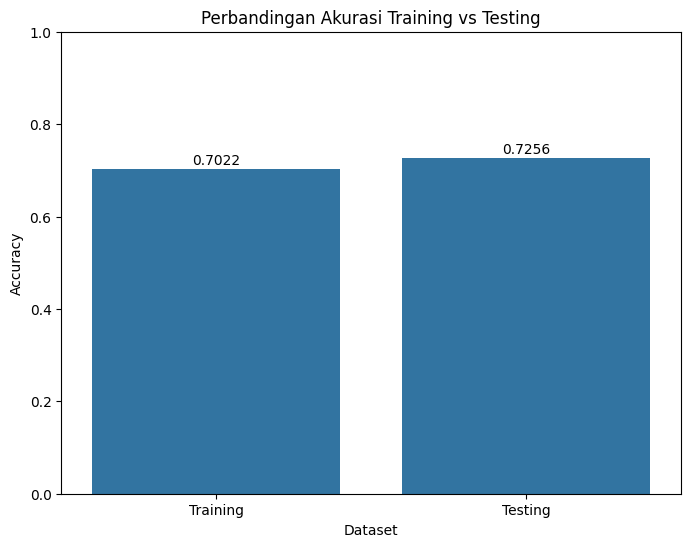

In [ ]:
plt.figure(figsize=(8, 6))
accuracies = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy]
})
sns.barplot(x='Dataset', y='Accuracy', data=accuracies)
plt.title('Perbandingan Akurasi Training vs Testing')
plt.ylim(0, 1)
for i, v in enumerate(accuracies['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

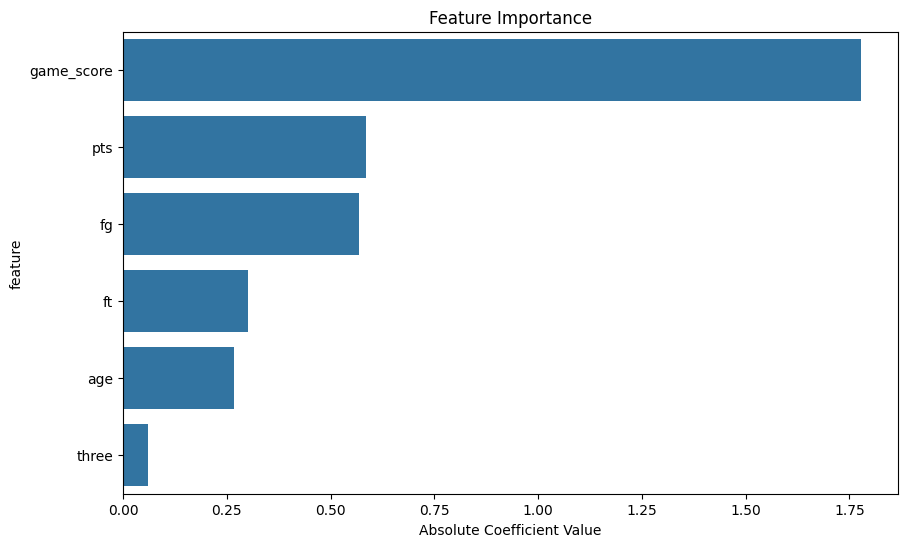

In [ ]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.show()

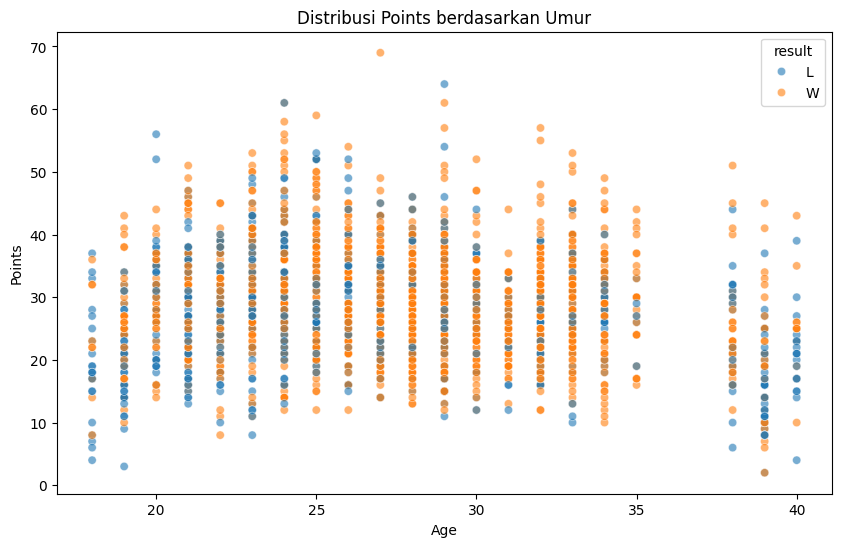

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='pts', hue='result', alpha=0.6)
plt.title('Distribusi Points berdasarkan Umur')
plt.xlabel('Age')
plt.ylabel('Points')
plt.show()

In [ ]:
def predict_result(age, fg, three, ft, pts, game_score):
    # Membuat array dari input
    new_data = np.array([[age, fg, three, ft, pts, game_score]])

    # Standardisasi input
    new_data_scaled = scaler.transform(new_data)

    # Membuat prediksi
    prediction = model.predict(new_data_scaled)
    probability = model.predict_proba(new_data_scaled)

    result = "Win" if prediction[0] == 1 else "Loss"
    win_probability = probability[0][1] * 100

    return result, win_probability

In [ ]:
print("\nContoh Prediksi:")
age = 34
fg = 13
three = 0
ft = 4
pts = 30
game_score = 17.8

result, probability = predict_result(age, fg, three, ft, pts, game_score)
print(f"Prediksi untuk pemain dengan stats:")
print(f"Age: {age}, FG: {fg}, 3PT: {three}, FT: {ft}, PTS: {pts}, Game Score: {game_score}")
print(f"Hasil: {result} (Probabilitas menang: {probability:.2f}%)")


Contoh Prediksi:
Prediksi untuk pemain dengan stats:
Age: 34, FG: 13, 3PT: 0, FT: 4, PTS: 30, Game Score: 17.8
Hasil: Loss (Probabilitas menang: 45.88%)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
